In [36]:
import pandas as pd
import seaborn as sns
import sys 
sys.path.append('../')
from functions import get_first_summer_day_per_year, get_first_winter_day_per_year
from operator import itemgetter
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt

In [37]:
get_first_winter_day_per_year(1996)

'1996-12-13'

In [41]:
winter_days_datetime = []
for i in range(1944, 2023):
    winter = pd.to_datetime(get_first_winter_day_per_year(i), format='ISO8601')
    if winter == None:
        year = i
        month = 9
        day = 15
    else:
        year = winter.year
        month = winter.strftime('%m')
        day = winter.strftime('%d')
    date_str = f'{str(year)}-{str(month)}-{str(day)}'
    datedate = pd.to_datetime(date_str)
    winter_days_datetime.append(datedate)

In [42]:
winter_days_datetime[10].day_of_year

322

In [43]:
years = []
months = []
days= []

for i in winter_days_datetime:
    years.append(i.year)
    months.append(i.month)
    days.append(i.day)

In [44]:
df = pd.DataFrame({'Year': years, 'Month': months, 'Day': days})

In [45]:
df['Day_of_the_year'] = 0

In [46]:
for ind, val in df.iterrows():
    df['Day_of_the_year'][ind] = winter_days_datetime[ind].day_of_year

In [47]:
df

,Year,Month,Day,Day_of_the_year
0,1944,9,15,259
1,1945,9,15,258
2,1946,12,13,347
3,1947,11,14,318
4,1948,12,24,359
...,...,...,...,...
74,2018,11,23,327
75,2019,9,15,258
76,2020,9,15,259
77,2021,11,29,333


In [48]:
dates = [int(i) for i in df['Day_of_the_year']]
years = [int(i) for i in df['Year']]

In [67]:
ticlist = [279, 299, 320, 340, 360]

In [59]:
first_day = datetime(1944, 1, 1)

In [68]:
datelist = []
for i in ticlist:
    datenum = first_day+timedelta(days=i-1)
    month = datenum.strftime('%m')
    day = datenum.strftime('%d')
    datelist.append(f'{month}-{day}')


In [74]:
colours = ['red' if value < 280 else 'blue' for value in dates]

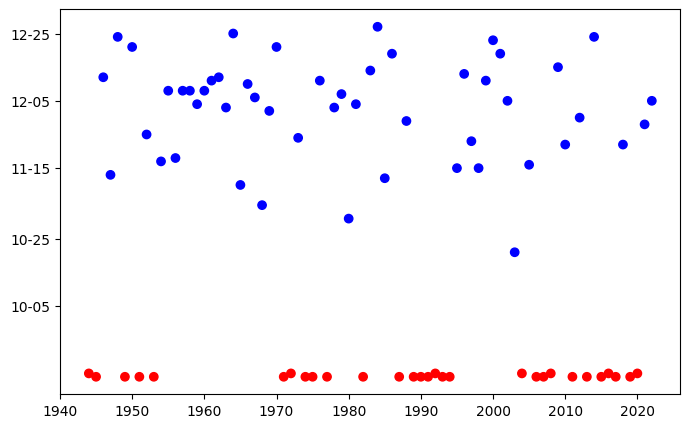

In [76]:
plt.figure(figsize=[8, 5])
plt.scatter(x=years, y=dates, c=colours)
plt.yticks(ticks=ticlist, labels=datelist)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()